# GMM in PCA space of ensemble of reanalysis datasets

In [1]:
from importlib import reload
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as ctp
import seaborn as sns
from sklearn import mixture, decomposition

from latgmm.utils import utenso, preproc, eof, utdata, utstats, metric
import latgmm.geoplot as gpl

plt.style.use("../../paper.mplstyle")

In [2]:
n_eofs = [2, 3, 4]
means_arr = []
for n in n_eofs:
    means_arr.append(xr.open_dataset(f"../../output/pcgmm/pcgmm_n{n}_k5_gmmmeans.nc"))
gmm_means = xr.concat(means_arr, dim=pd.Index(n_eofs, name="eof"))['ssta']

/tmp/ipykernel_16014/3694415221.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/pcgmm_gmmmeans_compare.png", dpi=300, bbox_inches="tight")
/tmp/ipykernel_16014/3694415221.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/pcgmm_gmmmeans_compare.png", dpi=300, bbox_inches="tight")
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


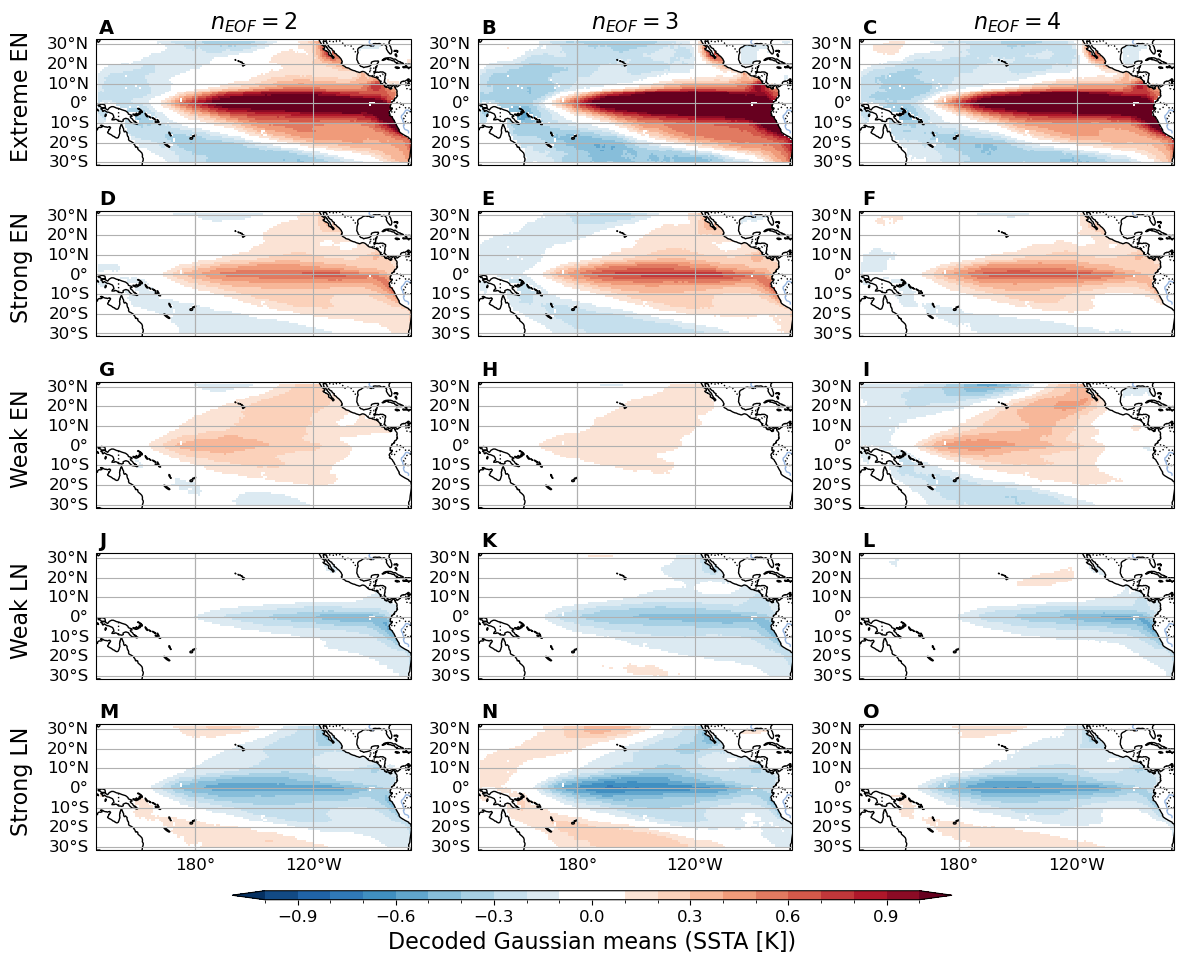

In [10]:
plparam = dict(vmin=-1, vmax=1, step=0.1, cmap='RdBu_r', centercolor="#ffffff")
gmm_order = [[2,3,0,1,4],
             [4,3,0,1,2],
             [3,2,4,0,1]]
labels = ["Extreme EN", "Strong EN", "Weak EN", "Weak LN", "Strong LN"]

nrows = len(gmm_means['mu'])
ncols = len(gmm_means['eof'])
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*1.8),
                        subplot_kw=dict(projection=ctp.crs.PlateCarree(central_longitude=180)))
for i in range(nrows):
    for j in range(ncols):
        ax = axs[i, j]
        im = gpl.plot_map(gmm_means.isel(mu=gmm_order[j][i], eof=j), ax=ax, add_bar=False,
                          central_longitude=180, **plparam)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i == nrows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False
        if i == 0:
            ax.set_title(r"$n_{EOF}=$"+f"{j+2}", fontsize=16)
        

        if j==0:
            ax.text(-0.2, 0.55, rf"{labels[i]}", va='bottom', ha='center',
                    rotation='vertical', rotation_mode='anchor',
                    transform=ax.transAxes, fontsize=16) 

# Shared colorbar
cbar_ax = fig.add_axes([0.2, -.01, 0.6, 0.01])
cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.7,
                    cax=cbar_ax, extend='both')
cbar.set_label(f"Decoded Gaussian means (SSTA [K])", size=16)

_ = gpl.enumerate_subplots(axs, pos_x=0.01, pos_y=1.05, fontsize=14)